

---


## Tutorial do artigo:
## Training and Meta-Training Binary Neural Networks with Quantum Computing



### **Autores:**
Fawaz, Abdulah, et al.


---


### **Grupo que criou o resumo e tutorial:**
Leal, Daivid V. e Felipe.


### **Problema:**

1. Encontrar um conjunto adequado de pesos para uma rede neural tornou-se um dos problemas mais estudados do aprendizado de máquina moderno.

2. É um desafio significativo aos cientistas da computação para os quais poucas alternativas bem-sucedidas estão disponíveis. Pode ser difícil explorar espaços de pesquisa muito grandes com eficiência e, pior, a otimização pode convergir para um mínimo local longe do ideal global.

3. Também é difícil entender o cenário das funções de custo, e escolher hiperparâmetros e projetar redes neurais permanece principalmente um processo manual.


### **Motivação:**

1. O aprendizado de máquina quântico visa encontrar uma vantagem na aplicação da computação quântica ao aprendizado de máquina.

2. Alguns algoritmos quânticos prometem uma revolução no aprendizado de máquina na teoricamente.

3. A principal vantagem dos qubits sobre os bits clássicos é sua capacidade de estar em superposições quânticas de estados.


### **Solução:**

A chave deste método é representar todos os parâmetros a serem investigados como qubits, que são então colocados em superposição e com isso aumentar a velocidade do processamento visto que as funções podem ser aplicadas de maneira paralela quando vários qubits estão em superposição.

### **Objetivo do Tutorial:**

* Neste tutorial, será apresentado como implementar um circuito quântico para que um computador quântico possa gerar um estado quântico que representa todo o cenário de custos para uma determinada rede neural e que o cenário completo da função de perda de uma rede neural pode ser representado como a saída do estado quântico por um computador quântico.

* Será apresentado como um computador quântico pode treinar uma rede neural binária manipulando os estados bom base na utilização de um algoritmo conhecido como amplificação de amplitude quântica.

Além disso, com pequenas adaptações, o método proposto também pode representar o cenário de meta-perdas de várias arquiteturas de redes neurais simultaneamente.



---


#  Conceitos básicos sobre computação quântica!

---

Bits quânticos, ou **qubits**, são a unidade fundamental da informação quântica, seus valores são manipulados aplicando **portas quânticas** a eles na forma de **circuitos quânticos**.

Abaixo podemos ver mais detalhes:

### Qubits:

  Eles **são fundamentalmente diferentes** dos bits clássicos. Enquanto os bits clássicos são completamente descritos como estando em um dos dois estados, **0 ou 1**, o **estado de um qubit** não pode ser completamente descrito por **apenas um único número.** Pode estar no estado 0, no estado 1 ou em uma superposição quântica de ambos.
  
  Matematicamente, o estado de um qubit é um vetor bidimensional com elementos complexos e uma norma unitária.
  
* ###  **Estado de um qubit:**

    Um estado puro qubit é uma superposição linear de dois estados. Isto significa que o qubit pode ser representado como uma combinação linear de ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/ed066a3ad158da0ad6d6a421a606b1c8a35eb95b) e ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/2f53021ca18e77477ee5bd3c1523e5830189ec5c):
    
 *    ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aabd1ffc6a57b00e254e4c212d98ebbea6ccc7fc)
    
  Onde α e β são amplitudes probabilísticas e geralmente podem ser números complexos.

  Quando nós medimos este qubit, a probabilidade de resultar ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/ed066a3ad158da0ad6d6a421a606b1c8a35eb95b) é ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/fa34618537661f2d4d710cc26e8afe891f50f7b8) e a probabilidade de resultar ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/2f53021ca18e77477ee5bd3c1523e5830189ec5c) é ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4caecb560883af3b9c0c3a1d0e13aae75f121d0d). 

  Porque o quadrado das amplitudes é igual à soma das probabilidades, resulta que α e β podem ser determinados pela equação:
    
     * ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d20d10d081d09b9a34ad569a60545eee046f6b34)

  Simplesmente porque isto garante que você deve medir um estado ou outro.



### Portas Quânticas:

Tanto na **computação clássica** quanto na **quântica**, **portas** **manipulam os estados de bits e qubits**. Como **vetores complexos**, os estados qubit são **transformados** entre si aplicando matrizes complexas chamadas **operadores** ou simplesmente **portas quânticas.**

* Essa transformação segue as regras da **álgebra linear** e um estado:
$$|\Psi\rangle$$ É transformado em um **estado** diferente: $$|\Phi\rangle $$ por uma **porta** $$U$$ de acordo com a transformação **da matriz** $$|\Psi\rangle=U|\Phi\rangle$$

 Para manter o requisito estrito de uma norma de unidade, essas matrizes são restritas a serem **unitárias**.
 

### Portas mais utilizadas:
  * **Porta X (NOT):**

  A porta X **inverte** o estado de um qubit de **|1⟩ a |0⟩** e vice-versa. É representada pela matriz:

$$X=\begin{bmatrix}
0 & 1\\ 
1 & 0
\end{bmatrix} $$
  *  ***Porta Z:***
  
  A porta Z atua em um único qubit. Equivale a uma rotação em torno do eixo Z. Transforma um estado arbitrário α |0⟩ + β |1⟩ no estado α |0⟩ - β |1⟩.
$$Z=\begin{bmatrix}
1 & 0\\ 
0 & -1
\end{bmatrix} $$

* ***H (Hadamard)***

  A Porta Hadamard também não possui analógico clássico. É usado para transformar qubits do seu estado inicial:
  
  * **|0⟩** para o estado: ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b63c1aafd4f747ae34793680ae964fd73725efe8)
  
 * **|1⟩** para o estado: ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4e428aaf74b13b0709992efede12bfa92e06247c)

  A sua matriz é dada por:
  $$H=\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1\\ 
1 & -1
\end{bmatrix}$$

* **CNOT (NOT Controlado ou cX)**
A porta CNOT pode ser vista como uma generalização da porta XOR clássica. Ele executa um gate NOT em um qubit de destino se um qubit de controle estiver no estado | 1⟩. 
$$CNOT=\begin{bmatrix}
1 & 0 & 0 & 0\\ 
0 & 1 & 0 & 0\\ 
0 & 0 & 0 & 1\\ 
0 & 0 & 1 & 0
\end{bmatrix}$$

# **Hands On!**

Instalando a biblioteca qiskit para realizar implementações, simulações e execuções de algortimos quânticos sobre a linguagem Python.

* pip install qiskit

## Passo FeedFoward da Rede

### Inicializando o qiskit e verificando os backends disponíveis.

In [1]:
## matplotlib to see the circuits
%matplotlib inline
## qiskit standart
from qiskit import *

## See available eviroments
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

### 1. Entendendo as partes do Perceptron

#### 1.1 Mutiplicando os pesos pelas entradas

In [2]:
# Definindo a multiplicação de um peso por uma entrada.
def multiplyWeightInput(circuit, x, y):
    circuit.x(x)
    circuit.cx(x, y)
    circuit.x(x)

Do qubit 0 ao qubit 2 do array temos os pesos e os demais são as entradas, logo:

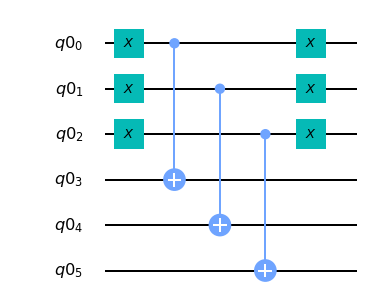

In [3]:
qWI = QuantumRegister(6)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI,)
# Definindo a quantidade de inputs da rede
qtd_input = 3

# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### 1.2 Criando a função de Ativação Majority para 3 entradas

In [4]:
# Essa função cria a majority definida no artigo para um perceptron com 3 entradas.
def activationFunction(circuit, listaQubit):
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    circuit.barrier()
    circuit.x(listaQubit[2])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[2])
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.barrier()
    circuit.ccx(listaQubit[1], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[0])
    circuit.ccx(listaQubit[0], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[0])
    circuit.barrier()
    circuit.ccx(listaQubit[0], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[1])
    circuit.ccx(listaQubit[1], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[1])
    circuit.barrier()

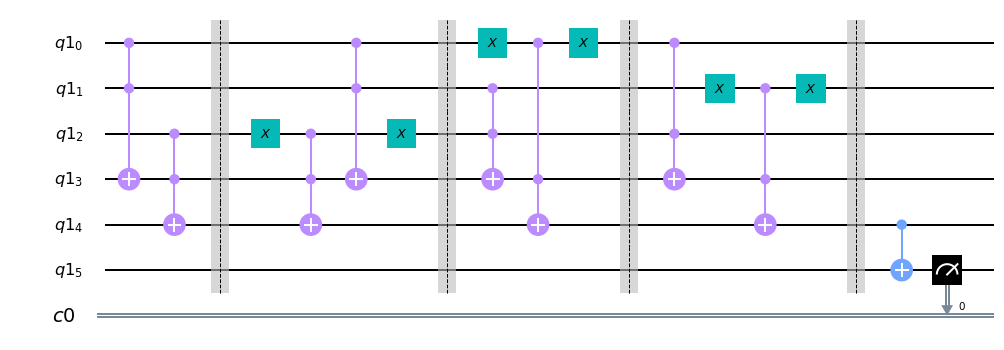

In [5]:
qWI = QuantumRegister(6) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = QuantumCircuit(qWI, c)

# Então, aqui temos a implementação de um perceptron com 3 entradas.
activationFunction(circuit, qWI[0:5])
circuit.cx(qWI[4], qWI[5])
circuit.measure(qWI[5], c[0])

# -----------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### 1.3 Exemplo da função majority

Veja a entrada |000>, devemos ter a saída 0.

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


Veja a entrada |110>, devemos ter a saída 1.

In [7]:
qWI = QuantumRegister(6) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)

circuit.x(qWI[0])
circuit.x(qWI[1])
circuit.x(qWI[2])

# Então, aqui temos a implementação de um perceptron com 3 entradas.
activationFunction(circuit, qWI[0:5])
circuit.cx(qWI[4], qWI[5])
circuit.measure(qWI[5], c[0])

job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'1': 1024}


### 2. O Perceptron
 
Neste exemplo temos entradas dos pesos como 0 e inputs como 0, é fácil ver que, de acordo com o circuito a saída deve ser 1.

#### 2.1 Criando o Perceptron

Criamos o perceptron utilizando as funções de multiplicação e a função de ativação.

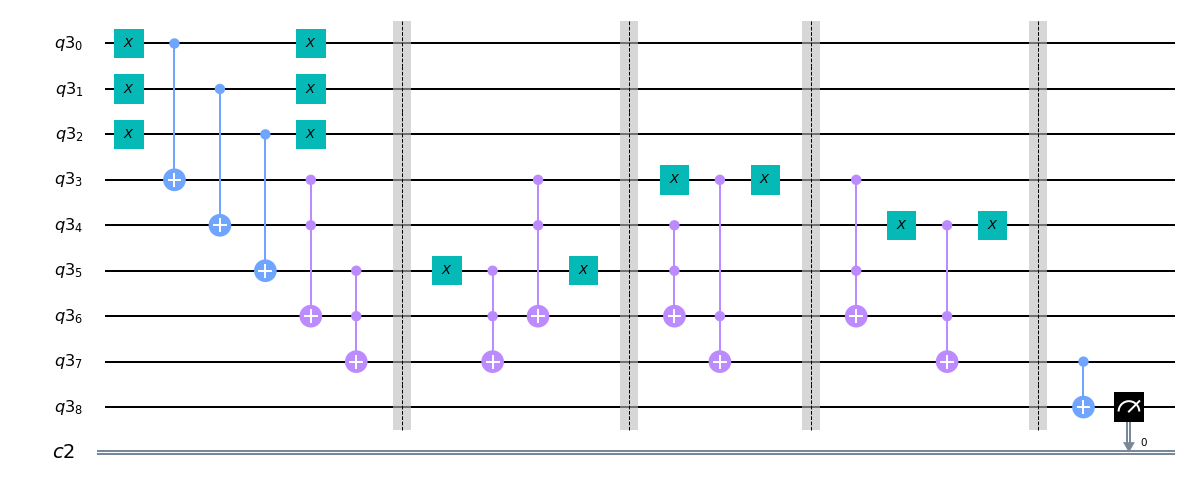

In [8]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(9) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = QuantumCircuit(qWI, c)
# definindo a quantidade de inputs
qtd_input = 3
# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:8])
circuit.cx(qWI[7], qWI[8])
circuit.measure(qWI[8], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### Executando o circuito

In [9]:
job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'1': 1024}


#### Vejamos um segundo exemplo com pesos |000> e entradas |101>

É fácil perceber que a saída será: 0

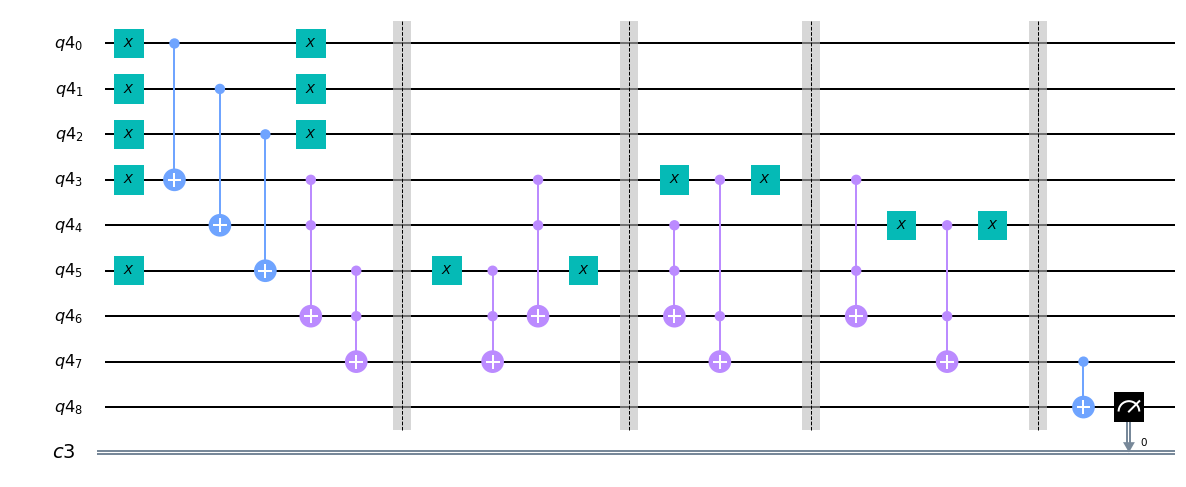

In [10]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(9) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3
# Mudando os inputs para que fique |101>
circuit.x(qWI[3])
circuit.x(qWI[5])
# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:8])
circuit.cx(qWI[7], qWI[8])
circuit.measure(qWI[8], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

In [11]:
job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


#### Compreendendo o resultado

Pudemos perceber que se necessitamos alterar as entradas, basta utilizar o operador "X" nos bits que desejamos que sejam 1. Além disso é fácil verificar que a função majority explicada pelo autor do Artigo segue o segunte padrão:

Pesos |000> e seguintes inputs, temos:

Inputs * Pesos => Saída  
|000> * |000>  => 1  
|001> * |000>  => 1  
|010> * |000>  => 1  
|011> * |000>  => 0  
|100> * |000>  => 1  
|101> * |000>  => 0  
|110> * |000>  => 0  
|111> * |000>  => 0

Ao alterar os pesos, alteramos as saídas também.

### Vejamos a construção da Rede Neural

A rede neural é composta por dois neurônio de entrada e dois neurônios de saída.
Neste primeiro exemplo, criaremos a rede sem otimizar o circuito, ficará grande porém fidedigno ao esquema correto apresentado pelo artigo.

P.s. Existem várias maneiras de implementar este circuito!

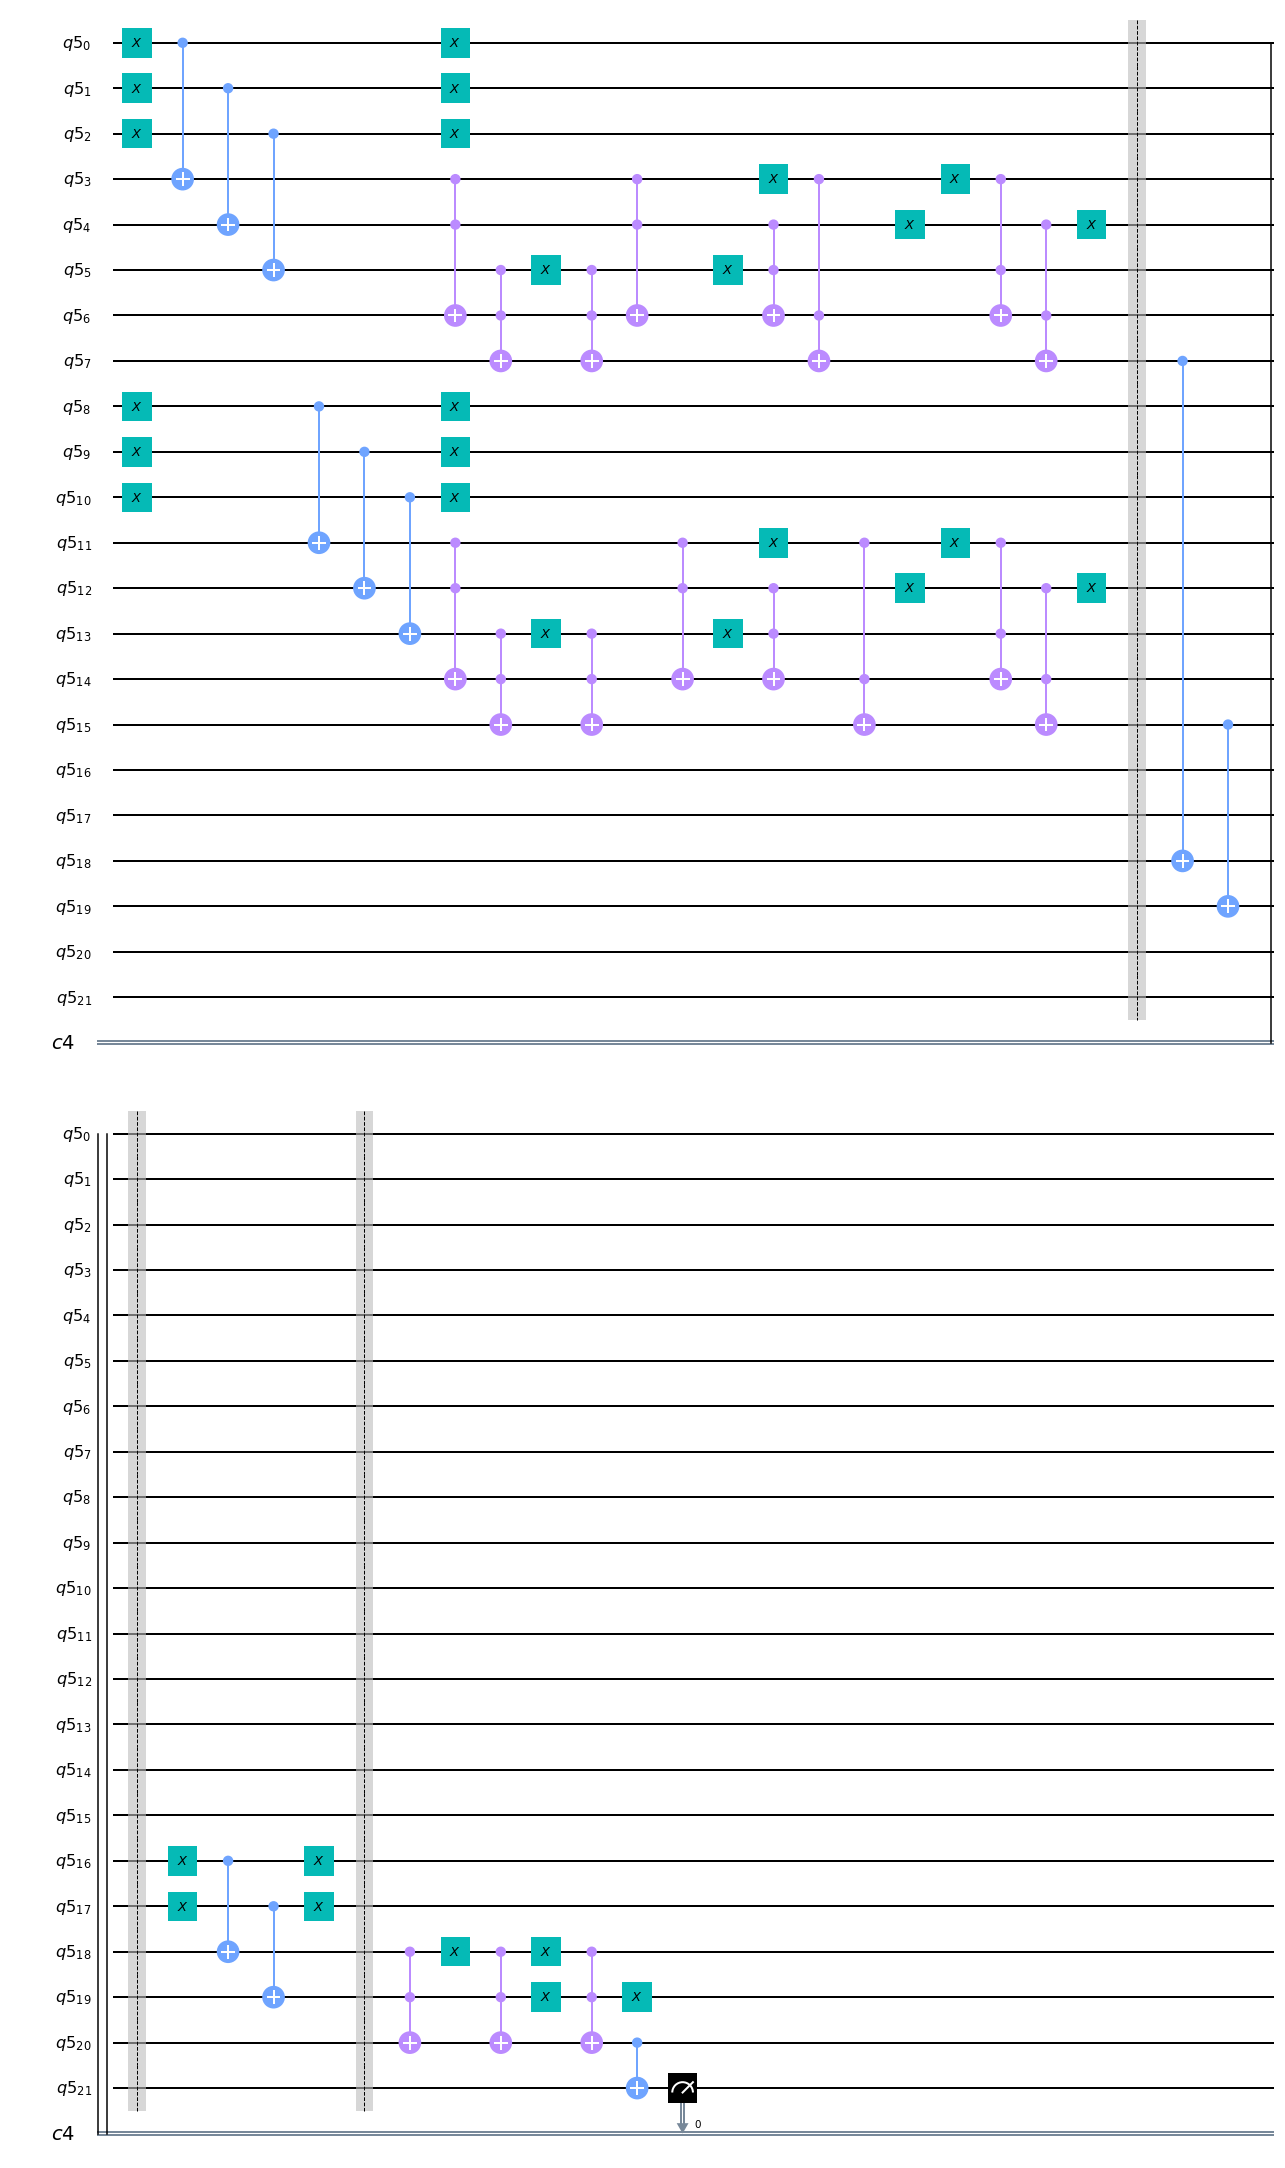

In [12]:
# Redefini a função majority sem as barreiras para facilitar a visualização, 
# isto não afetará o resultado do circuito.
def activationFunction(circuit, listaQubit):
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[2])
    circuit.ccx(listaQubit[2], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[2])
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.ccx(listaQubit[1], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[0])
    circuit.ccx(listaQubit[0], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[0])
    circuit.ccx(listaQubit[0], listaQubit[2], listaQubit[3])
    circuit.x(listaQubit[1])
    circuit.ccx(listaQubit[1], listaQubit[3], listaQubit[4])
    circuit.x(listaQubit[1])

# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(22) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3

# Então, aqui temos a implementação do primeiro perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]

# Vejamos o segundo perceptron que também tem 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(8, 11)]

activationFunction(circuit, qWI[3:8])
activationFunction(circuit, qWI[11:16])
circuit.barrier()
circuit.cx(qWI[7], qWI[18])
circuit.cx(qWI[15], qWI[19])
circuit.barrier()

multiplyWeightInput(circuit, qWI[16], qWI[18])
multiplyWeightInput(circuit, qWI[17], qWI[19])
circuit.barrier()

circuit.ccx(qWI[18], qWI[19], qWI[20])
circuit.x(qWI[18])
circuit.ccx(qWI[18], qWI[19], qWI[20])
circuit.x(qWI[18])
circuit.x(qWI[19])
circuit.ccx(qWI[18], qWI[19], qWI[20])
circuit.x(qWI[19])

circuit.cx(qWI[20],qWI[21])

circuit.measure(qWI[21], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

In [13]:
job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


#### Pensando no melhoramento da performance do algoritmo, em questões de utilização de quBits.

Bem, acima temos o modelo que foi utilizado, e aos poucos vamos tentar reduzir a quantidade de quBits utilizandos para a contrução da Rede. Podemos perceber que a entrado do circuito para a rede, será sempre a mesma e que só precisamos reinicializar os quBits para o estado inicial da entrada, logo temos: 

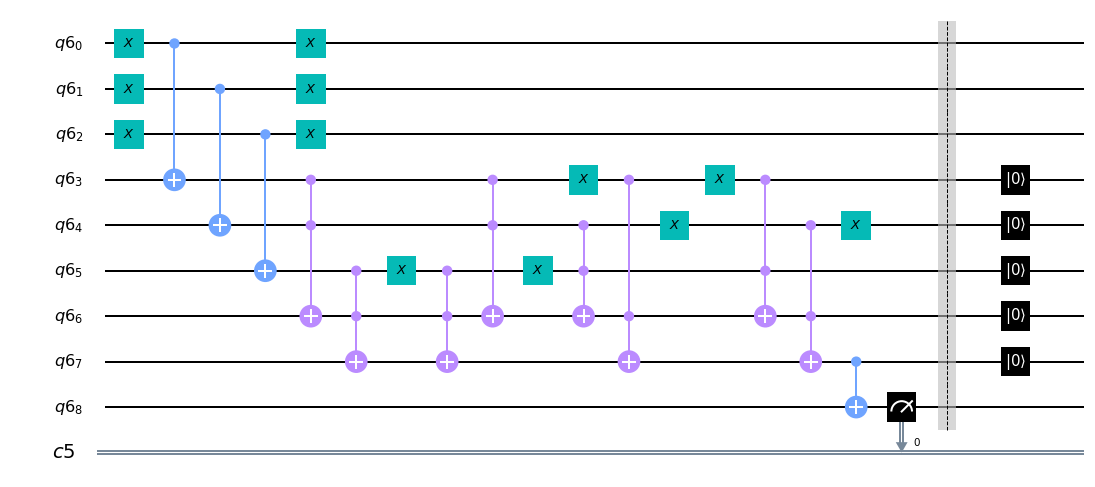

In [14]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(9) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3

# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:8])
circuit.cx(qWI[7], qWI[8])
circuit.measure(qWI[8], c[0])
circuit.barrier()

circuit.reset(qWI[3:8])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### O que foi feito?
Com a função ".reset()" reinicializamos 5 quBits para seu estado original e podemos reutilizá-los ao invés de ter que utilizar novos quBits. Além disso, note que não resetamos o quBit com a saída do perceptron.

Em seguida temos.

Para 1 perceptron e seus respectivos pesos e entradas foram necessários somente 9 quBits contando com suas ancillas.
Vejamos então, como podemos reutilizar os quBits de entradas, os utilizados para a função de ativação e as ancillas.

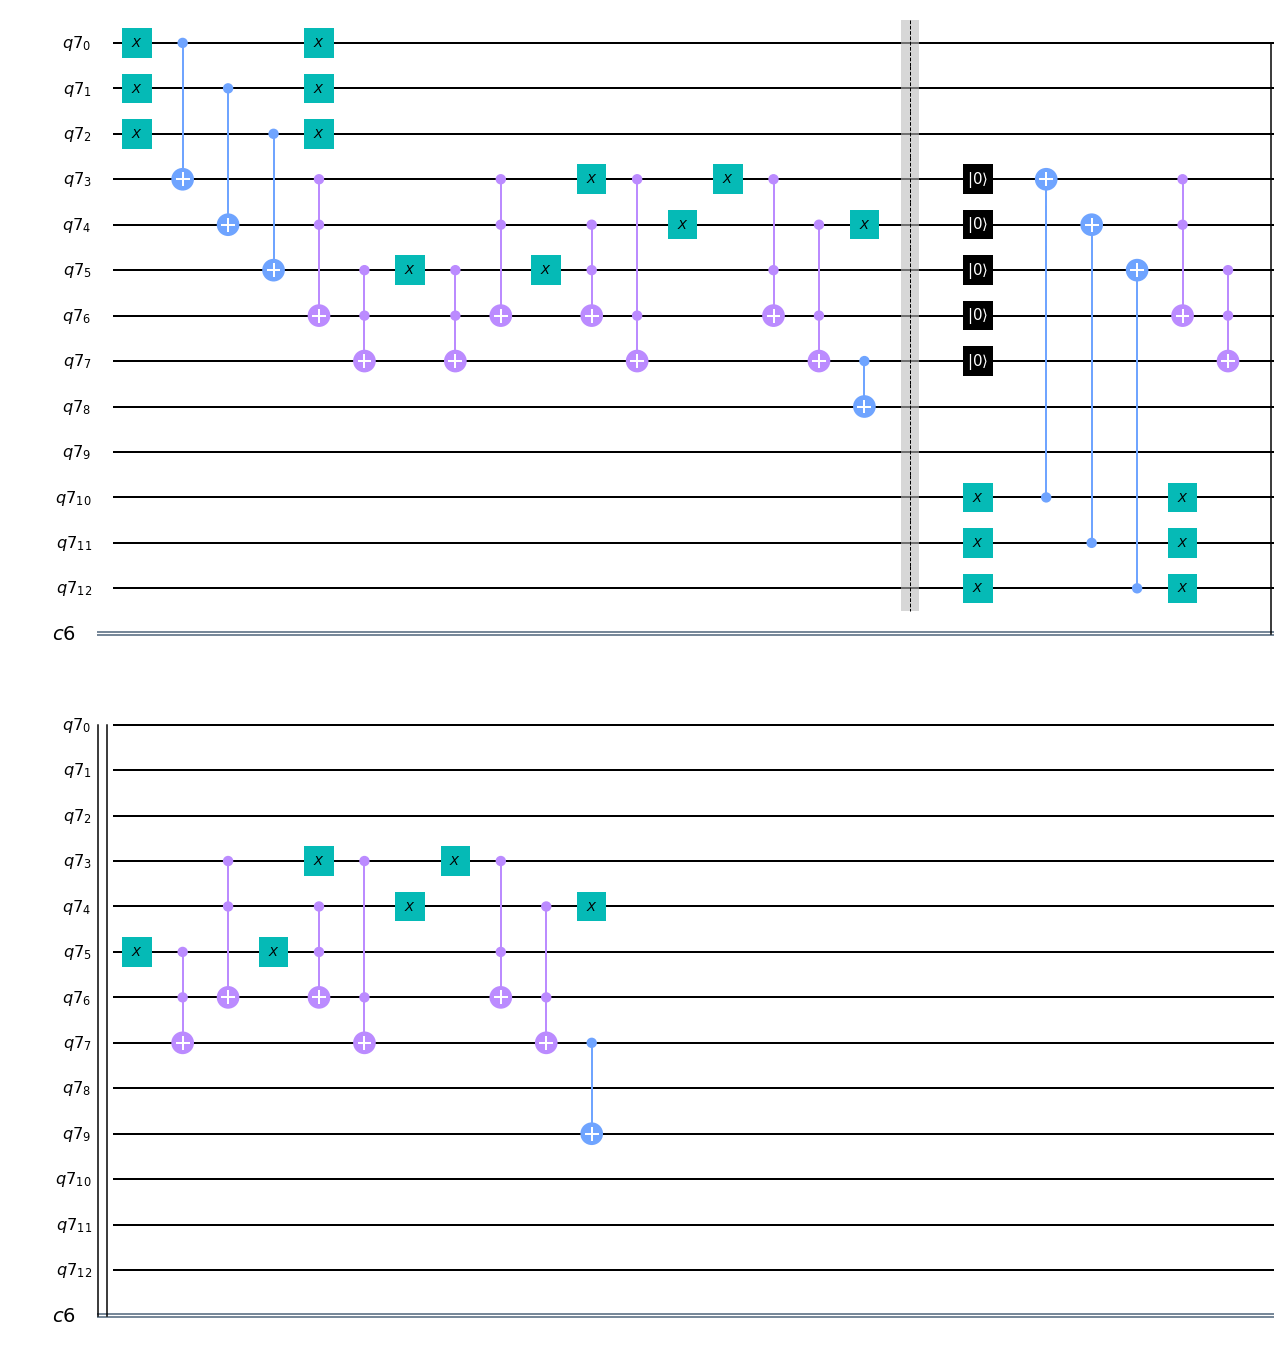

In [15]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(13) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3

# Então, aqui temos a implementação do primeiro perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:8])
circuit.cx(qWI[7], qWI[8])

circuit.barrier()

circuit.reset(qWI[3:8])

# Vejamos o segundo perceptron que também tem 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i - qtd_input - 4]) for i in range(10, 13)]
activationFunction(circuit, qWI[3:8])
#circuit.barrier()
circuit.cx(qWI[7], qWI[9])
#circuit.barrier()

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")


#### Desse modo, conseguimos reutilizar 5 qubits e reduzir 3 neurônios.

E ao final, podemos utilizar os mesmo 5 quBits para obter a saída da rede, adicionando somente 1 qubit, que será a nossa saída, logo temos:

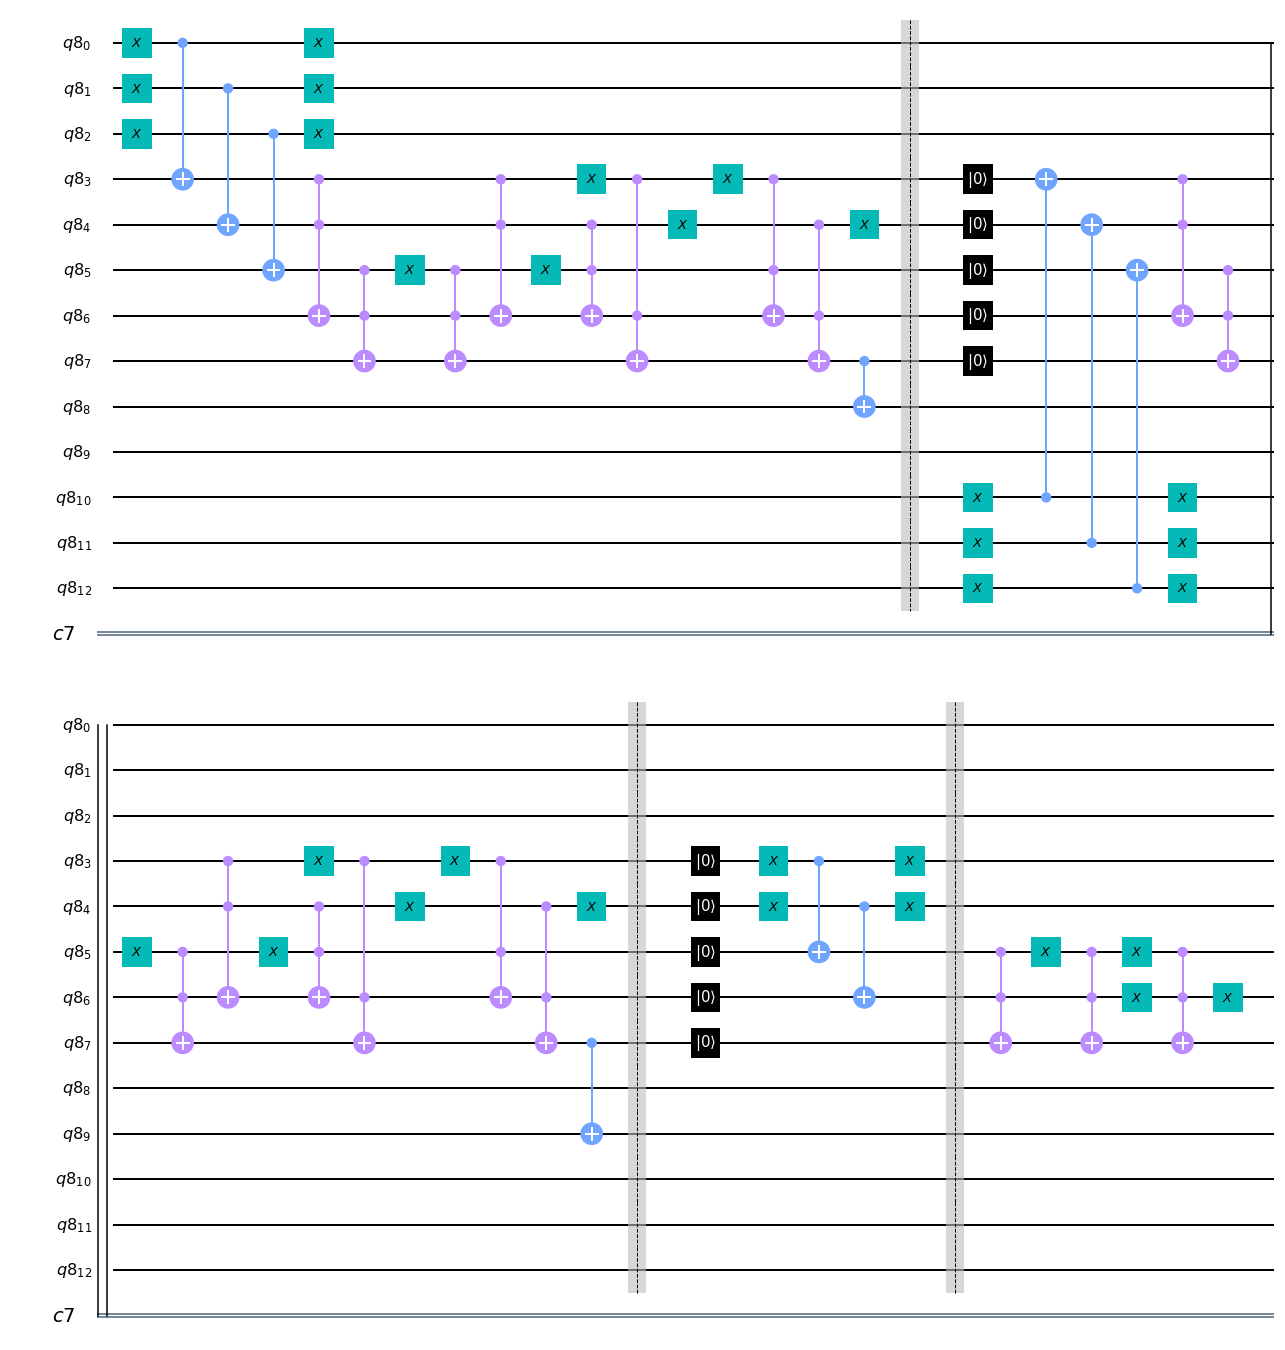

In [16]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(13) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3

# Então, aqui temos a implementação do primeiro perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:8])
circuit.cx(qWI[7], qWI[8])

circuit.barrier()

circuit.reset(qWI[3:8])

# Vejamos o segundo perceptron que também tem 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i - qtd_input - 4]) for i in range(10, 13)]
activationFunction(circuit, qWI[3:8])
#circuit.barrier()
circuit.cx(qWI[7], qWI[9])
circuit.barrier()

circuit.reset(qWI[3:8])

multiplyWeightInput(circuit, qWI[3], qWI[5])
multiplyWeightInput(circuit, qWI[4], qWI[6])
circuit.barrier()

circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.x(qWI[5])
circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.x(qWI[5])
circuit.x(qWI[6])
circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.x(qWI[6])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

##### Perceba que pudemos utilizar os últimos como pesos, pois não vamos zerar novamente os quBits.

A medição da saída precisará ser realizada, logo, em código completo temos:

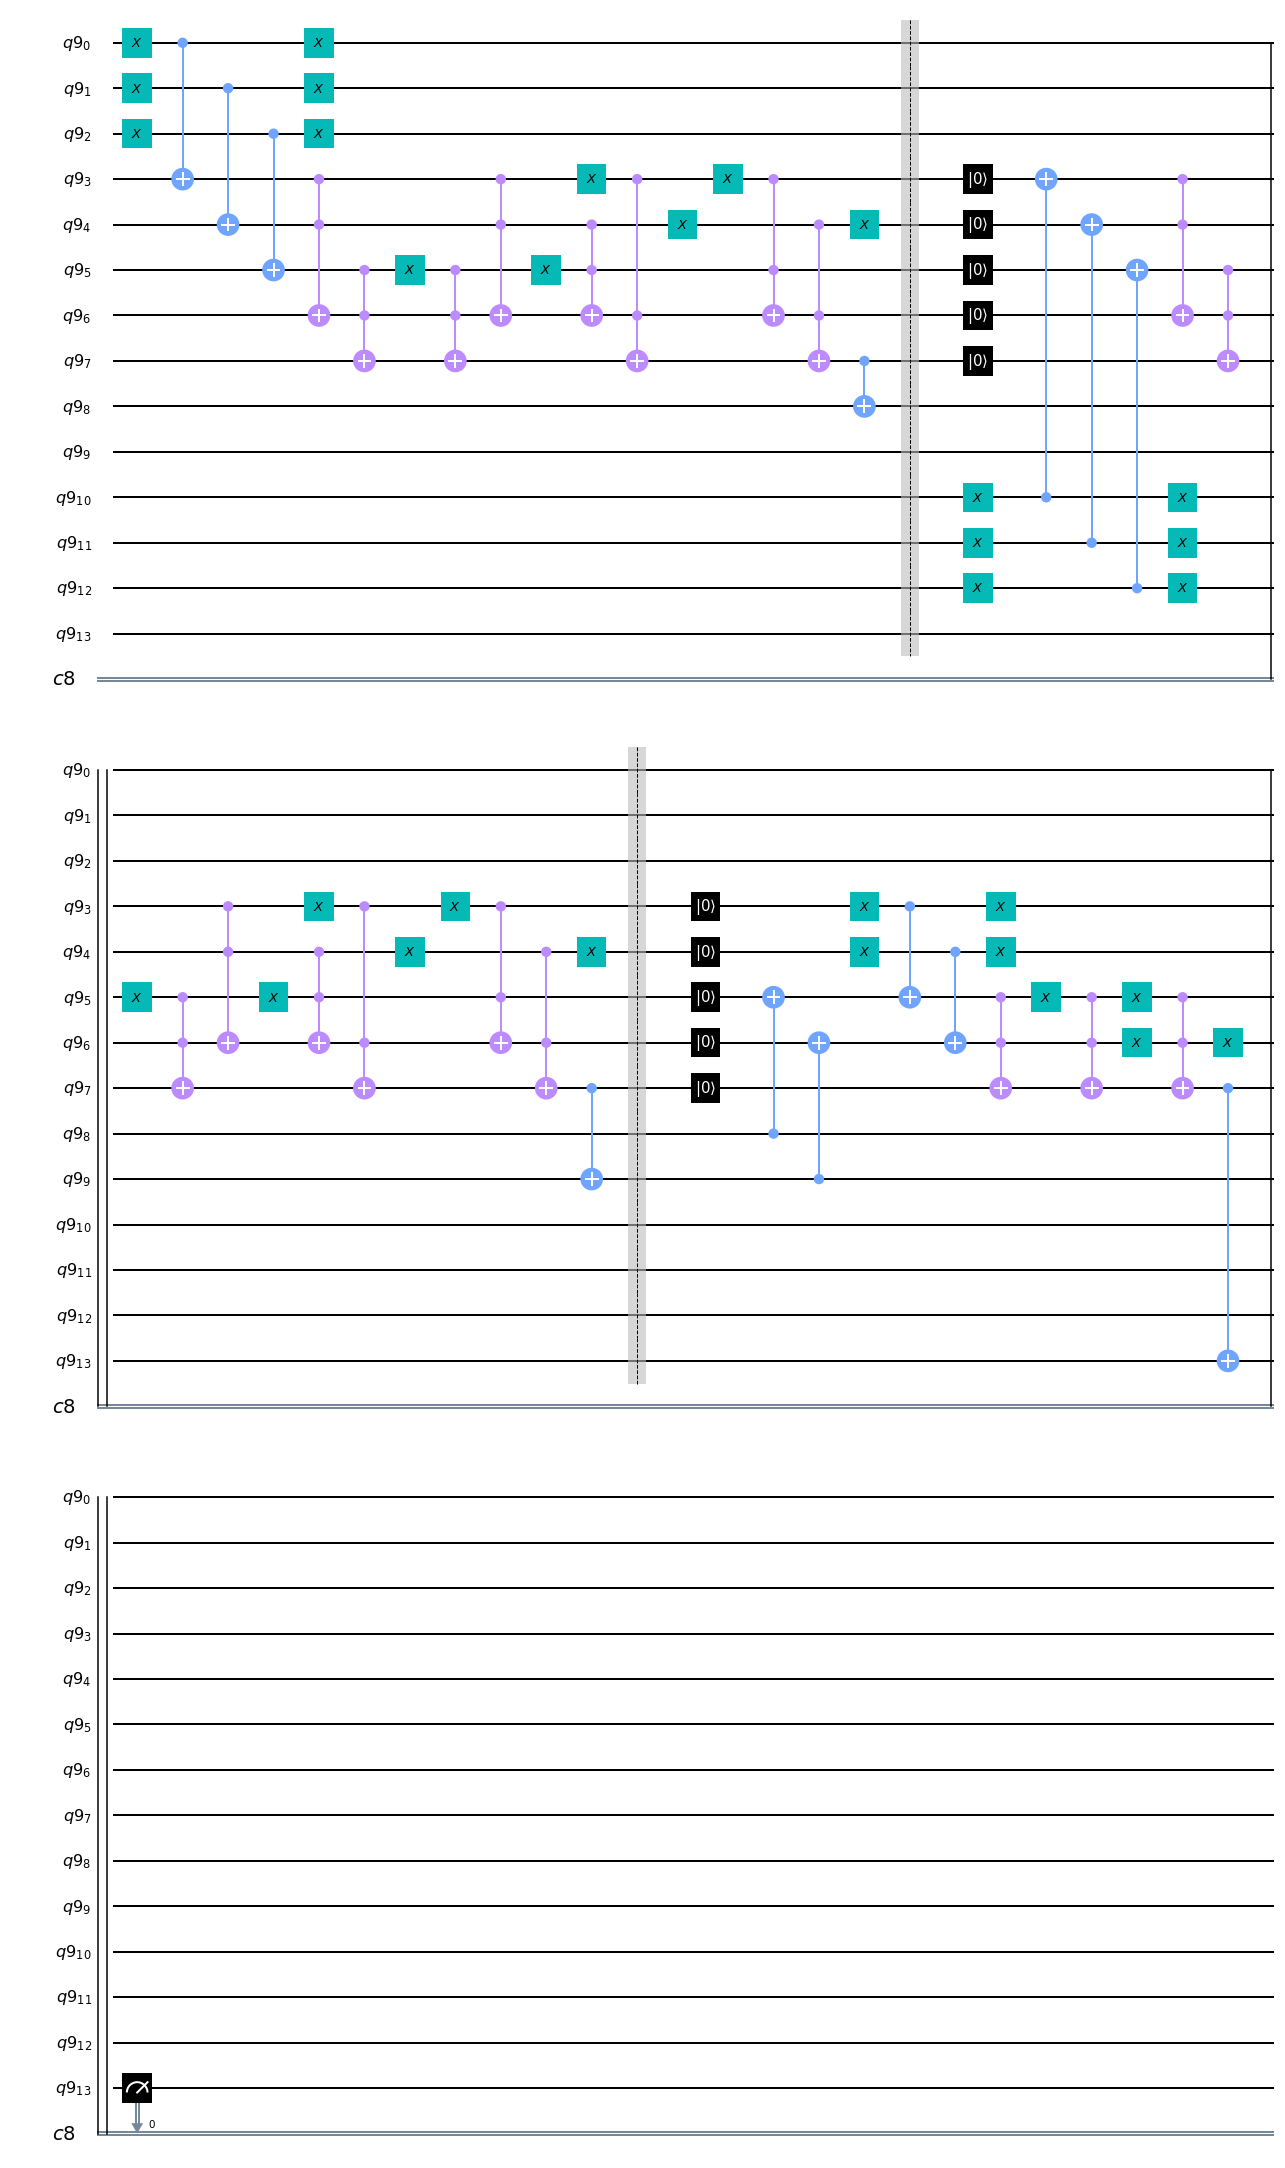

In [17]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(14) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3

# Então, aqui temos a implementação do primeiro perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:8])
circuit.cx(qWI[7], qWI[8])

circuit.barrier()

circuit.reset(qWI[3:8])

# Vejamos o segundo perceptron que também tem 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i - qtd_input - 4]) for i in range(10, 13)]
activationFunction(circuit, qWI[3:8])

circuit.cx(qWI[7], qWI[9])
circuit.barrier()
circuit.reset(qWI[3:8])
circuit.cx(qWI[8], qWI[5])
circuit.cx(qWI[9], qWI[6])
multiplyWeightInput(circuit, qWI[3], qWI[5])
multiplyWeightInput(circuit, qWI[4], qWI[6])
circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.x(qWI[5])
circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.x(qWI[5])
circuit.x(qWI[6])
circuit.ccx(qWI[5], qWI[6], qWI[7])
circuit.x(qWI[6])

circuit.cx(qWI[7],qWI[13])
circuit.measure(qWI[13], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

In [18]:
job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


#### Percebemos que:

- Fizemos pequenas alterações e uma mudança de pensamento simples e conseguimos reduzir a rede para a utilização de 14 qubits;
- Utilizando 14 quBits ao invés de 22 temos um ganho na redução de memória e processamento;

## Passo Otimização dos pesos da Rede

### **Limitações**

1 - Devido à inevitável questão de ser capaz apenas de simular circuitos quânticos envolvendo um pequeno número de qubits, dizem que foram forçados a se restringir a um pequeno problema construído como prova de conceito. Essa é a razão pela qual escolheram investigar uma rede neural binária tão pequena - os pesos podem ser representados usando poucos qubits. 

2 - Resaltaram várias vezes que esse método não se restringe a pesos ou parâmetros binarizados, e que métodos análogos usando representações de ponto flutuante seriam possíveis, com mais qubits, e o método funcionaria de forma idêntica, porém em nenhum momento apresentaram uma solução que se aproxime disse, se mantiveram apensar com as explicações binárias.

(Portanto, o cerne da tarefa é construir um circuito quântico que forme um análogo quântico da rede neural escolhida. Este circuito quântico deve ter os parâmetros desejados armazenados nos valores de qubits e, dado um conjunto de pesos e dados, produzir a mesma precisão que seu equivalente clássico. Qualquer parâmetro escolhido pode ser configurado para uma superposição quântica aplicando uma única porta Hadamard.)


### **Resultado**

O método mostra-se versátil e capaz de representar um cenário de meta-custo de todos os parâmetros e hiperparâmetros possíveis. Aplicando-o às conectividades e pesos de uma rede neural binária e simulando o algoritmo quântico em um computador clássico, mostramos ainda que esse "estado de paisagem" pode ser usado para treinar e meta-treinar a rede neural binária para um pequeno problema simples usando amplitude quântica amplificação, um algoritmo quântico padrão.

### **Possibilidade de Melhoria**

O artigo faz uso de simuladores para rodar o algoritmo quântico, podemos fazê-lo roda em um computador quântico da IBM para podermos verificar se o resultado quando rodamos fora do ambiente simulado é o mesmo, e se é aplicável caso seja diferente.

Tentar também criar uma prova de conceito para redes não binárias. 